In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from scipy.stats import multivariate_normal
from matplotlib.colors import LogNorm
from sklearn import mixture

### Question 1

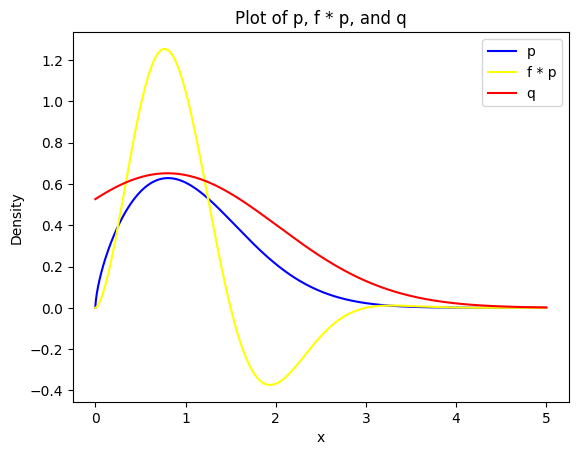

In [52]:
# Define the functions p(x), q(x), and f(x)
def p(x):
    if np.any(x < 0):
        raise ValueError("p(x) is not defined for x < 0")
    return np.abs(x)**0.65 * np.exp(-x**2 / 2)

def q(x, mu=0.8):
    return 2 / np.sqrt(2 * np.pi * 1.5) * np.exp(-((mu - x)**2) / (2 * 1.5))

def f(x):
    if np.any(x < 0):
        raise ValueError("f(x) is not defined for x < 0")
    return 2 * np.sin((2 * np.pi / 3) * x)


# Function to calculate importance weights
def calculate_weights(x_values):
    return p(x_values) / q(x_values)

# Importance sampling procedure
def importance_sampling(n_samples):
    # Sample from q(x)
    samples_q = np.random.normal(0.8, 1.5, n_samples)

    # Filter out negative samples
    valid_samples = samples_q[samples_q >= 0]

    # Raise an error if there are no valid samples
    if len(valid_samples) == 0:
        raise ValueError("No valid samples to compute importance sampling")

    # Calculate importance weights
    weights = calculate_weights(valid_samples)

    # Normalize weights
    weights /= np.sum(weights)

    # Estimate the expectation using importance weights and the function f(x)
    expectation_estimate = np.mean(weights * f(valid_samples))

    return expectation_estimate

# Plotting
x_values = np.linspace(0, 5, 1000)  # Adjust the range as needed

plt.plot(x_values, p(x_values), label='p', color='blue')
plt.plot(x_values, f(x_values) * p(x_values), label='f * p', color='yellow')
plt.plot(x_values, q(x_values), label='q', color='red')

plt.title('Plot of p, f * p, and q')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()



### Question 2

In [40]:
# Sample sizes to test
sample_sizes = [10, 100, 1000, 10000]

# Run importance sampling for each sample size
for n_samples in sample_sizes:
    estimates = []
    for _ in range(100):  # Run the procedure 100 times for each sample size
        try:
            estimate = importance_sampling(n_samples)
            estimates.append(estimate)
        except ValueError as e:
            print(f"Sample Size: {n_samples}, Error: {e}")

    if len(estimates) > 0:
        mean_estimate = np.mean(estimates)
        variance_estimate = np.var(estimates)

        print(f"Sample Size: {n_samples}, Mean Estimate: {mean_estimate}, Variance Estimate: {variance_estimate}")



Sample Size: 10, Mean Estimate: 0.09791943180712989, Variance Estimate: 0.009391413606749152
Sample Size: 100, Mean Estimate: 0.009568659294082021, Variance Estimate: 6.1671984394734024e-06
Sample Size: 1000, Mean Estimate: 0.0009718012033203836, Variance Estimate: 5.7118935519602775e-09
Sample Size: 10000, Mean Estimate: 9.740487420591707e-05, Variance Estimate: 5.9883319564335645e-12


### Question 3


=== mu = 0.8 ===
Sample Size: 10, Mean Estimate: 0.0887722625552654, Std Estimate: 0.1972207305344852
Sample Size: 100, Mean Estimate: 0.00988398220480523, Std Estimate: 0.02181934230152165
Sample Size: 1000, Mean Estimate: 0.0009062131941345827, Std Estimate: 0.002201815703595631
Sample Size: 10000, Mean Estimate: 9.813602775016779e-05, Std Estimate: 0.00021387082839236014

=== mu = 6 ===
Sample Size: 10, Mean Estimate: 0.07558910385018046, Std Estimate: 0.2686655826965832
Sample Size: 100, Mean Estimate: -0.009668225878169807, Std Estimate: 0.10569795072689935
Sample Size: 1000, Mean Estimate: 0.0014227209312660065, Std Estimate: 0.04759104013389968
Sample Size: 10000, Mean Estimate: 0.00011136150531456086, Std Estimate: 0.0065874983957068


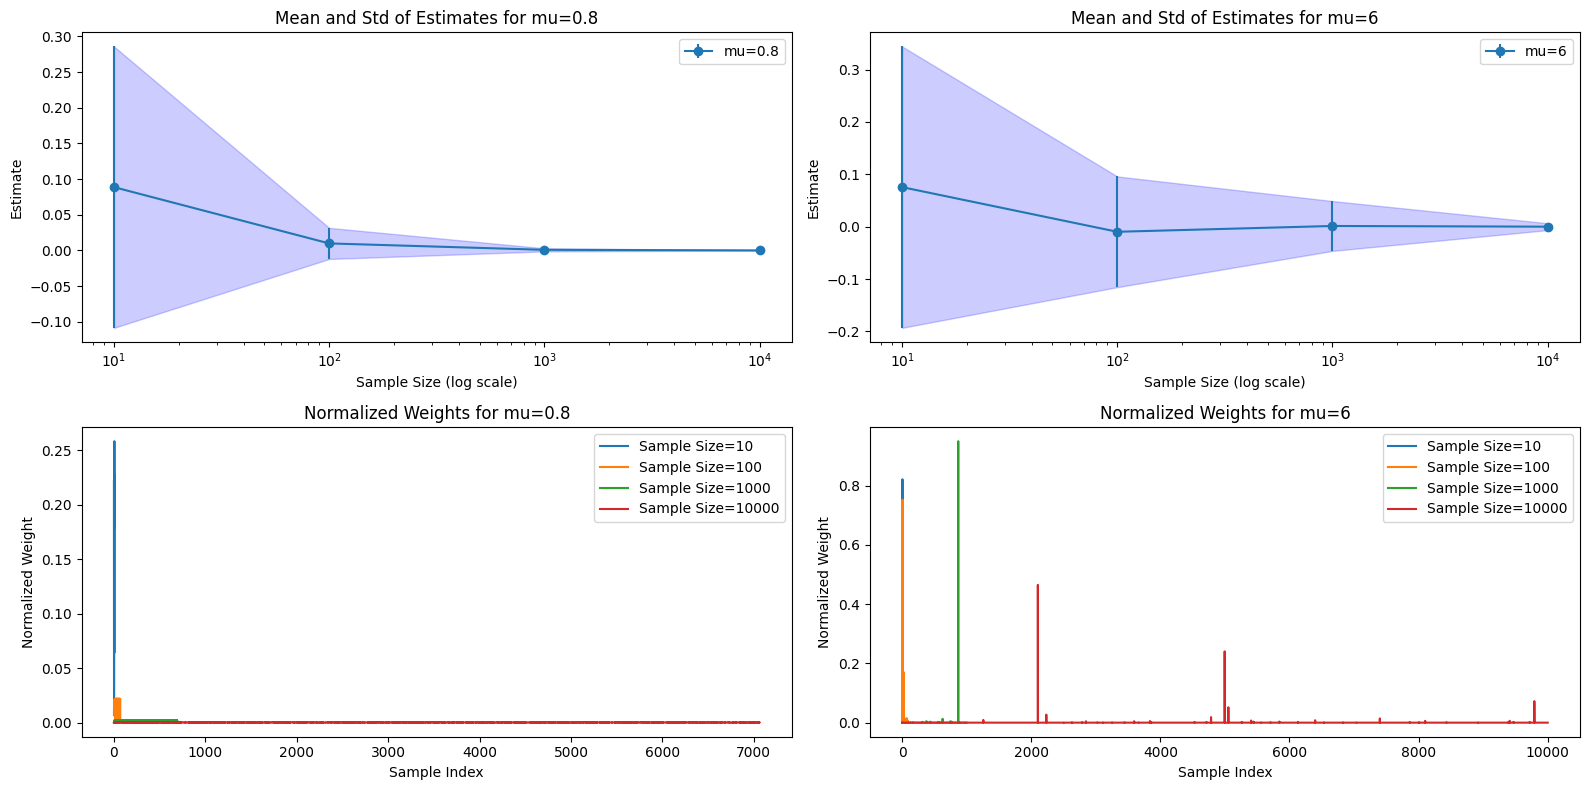

In [41]:
# Function to calculate importance weights
def calculate_weights(x_values, mu=0.8):
    return p(x_values) / q(x_values, mu)

# Importance sampling procedure
def importance_sampling(n_samples, mu=0.8):
    # Sample from q(x) and ensure only positive samples
    samples_q = np.random.normal(mu, 1.5, n_samples)
    samples_q = samples_q[samples_q >= 0]  # Filter out negative samples

    # Raise an error if there are no valid samples
    if len(samples_q) == 0:
        raise ValueError("No valid samples to compute importance sampling")

    # Calculate importance weights
    weights = calculate_weights(samples_q, mu)

    # Normalize weights
    weights /= np.sum(weights)

    # Estimate the expectation using importance weights and the function f(x)
    expectation_estimate = np.mean(weights * f(samples_q))
    std_estimate = np.std(weights * f(samples_q))

    return expectation_estimate, std_estimate, weights

# Sample sizes to test
sample_sizes = [10, 100, 1000, 10000]

# Values of mu
mu_values = [0.8, 6]

# Lists to store results
mean_estimates = []
std_estimates = []
weights_list = []

# Run importance sampling for each mu and sample size
for mu in mu_values:
    print(f"\n=== mu = {mu} ===")
    mean_estimates_mu = []
    std_estimates_mu = []
    weights_mu_list = []

    for n_samples in sample_sizes:
        try:
            mean_estimate, std_estimate, weights = importance_sampling(n_samples, mu)
            mean_estimates_mu.append(mean_estimate)
            std_estimates_mu.append(std_estimate)
            weights_mu_list.append(weights)
            print(f"Sample Size: {n_samples}, Mean Estimate: {mean_estimate}, Std Estimate: {std_estimate}")
        except ValueError as e:
            print(f"Sample Size: {n_samples}, Error: {e}")

    mean_estimates.append(mean_estimates_mu)
    std_estimates.append(std_estimates_mu)
    weights_list.append(weights_mu_list)

# Plotting
plt.figure(figsize=(16, 8))

# Plot mean and std of estimates with shaded error regions
for i, mu in enumerate(mu_values):
    plt.subplot(2, 2, i + 1)
    plt.errorbar(sample_sizes, mean_estimates[i], yerr=std_estimates[i], label=f'mu={mu}', marker='o')
    plt.fill_between(sample_sizes, np.array(mean_estimates[i]) - np.array(std_estimates[i]),
                     np.array(mean_estimates[i]) + np.array(std_estimates[i]), color='blue', alpha=0.2)
    plt.xscale('log')
    plt.title(f'Mean and Std of Estimates for mu={mu}')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Estimate')
    plt.legend()

# Plot normalized weights
for i, mu in enumerate(mu_values):
    plt.subplot(2, 2, i + 3)
    for j, n_samples in enumerate(sample_sizes):
        plt.plot(weights_list[i][j], label=f'Sample Size={n_samples}')
    plt.title(f'Normalized Weights for mu={mu}')
    plt.xlabel('Sample Index')
    plt.ylabel('Normalized Weight')
    plt.legend()

plt.tight_layout()
plt.show()


In the case $\mu=6$, the importance weights have much more outliers than for $\mu=0.8$. 

Mean and std of estimates: the standard deviation of the estimates is much higher in the case $\mu=6$ because we more often have $p(x)\geq \gamma q(x)$, which corresponds to the outliers in the importance weights.
The fundamental equality $\mathbb{E}_p[f(X)]=\mathbb{E}_q[f(X)\frac{p(X)}{q(X)}]$ holds if $Supp(f\times p)\subseteq Supp(q)$. This equality justifies our empirical estimator but the assumption is not "really true" in the case $\mu=6$ since $Supp(f\times p)$ is more in the distribution tail of $q$ than in its center of mass, which explains the worse performance with $\mu=6$.

We also observe that there are much less samples available (around 7000) for $\mu=0.8$ because it is much more probable to have negative samples from $q$, and these samples are discarded.

To conclude, naive importance sampling is strongly dependent on the law $q$ according to which the data are generated: it must not be too different from the target distribution $p$.

Question 4 is handwritten, in the pdf.

### Question 5

In [44]:
#Parameter values
sigma = 1
d = 5
b = 0.4
N = 10000

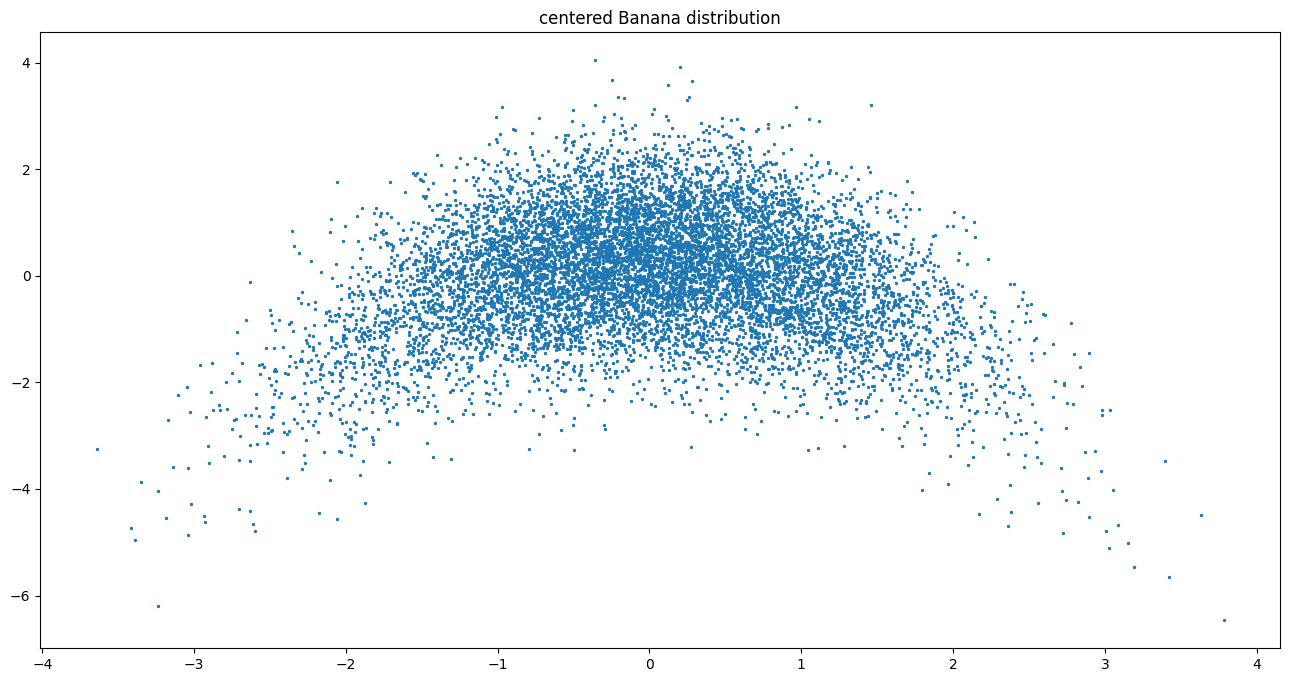

In [50]:
#Compute values of nu(x) for each sample x
def nu(X, sigma, d, b):
    Sigma = np.eye(d)
    Sigma[0, 0] = sigma**2
    X = np.array(X)
    Y = X.copy()
    Y[:, 1] += b*(Y[:, 0]**2 - sigma**2)

    pdf_values = stats.multivariate_normal.pdf(Y, mean=np.zeros(d), cov=Sigma)
    return pdf_values

#Compute the GMM q given by the parameters theta for each sample x
def GMM(X, theta):
    mu, sigma, alpha = theta['mu'], theta['sigma'], theta['alpha']
    K = len(alpha)
    X = np.array(X)
    res = np.zeros(X.shape[0])
    for k in range(K):
        res += alpha[k]*stats.multivariate_normal.pdf(X, mean=mu[k], cov=sigma[:,:,k])
    return res

#generate the sampke using
def Banana(d, sigma, b , N):
    Sigma = np.eye(d)
    Sigma[0,0] = sigma**2

    X = np.random.multivariate_normal(np.zeros(d), Sigma, size = N)
    X[:,1] -= b*(X[:,0]**2 - sigma**2)

    return X

#Plot projection on two first coordinates of the banana distribution
X = Banana(d, sigma, b , N)
plt.figure(figsize=(16, 8))
plt.scatter(X[:,0], X[:,1], s = 2)
plt.title("centered Banana distribution")
plt.show()

In [ ]:
#Parameters (arbitrary)
nb_EM=20
nb_PMC=15

Visually, to "cover" a banana by gaussians, 3 gaussians should suffice (5 would be even more precise).

In [ ]:
#Number of clusters
K=3

Let us now provide much more concise code than in Exercise 2 to perform EM. Instead of doing explictly the computation of $\tilde{\tau}$ we use stats.multivariate_normal.pdf.

In [ ]:
def EM_for_PMC(w, X,  alphas_init, mus_init, Sigmas_init,Niter):

    X = np.array(X)
    N, d = X.shape

    #These will always contain the "last" estimator of alphas, mus and Sigmas (Theta^t)
    alphas = alphas_init 
    mus = mus_init
    Sigmas = Sigmas_init

    #These will contain the estimators of alphas, mus and Sigmas and also the responsabilities (posterior of z) over the iterations
    all_alphas = [alphas]
    all_mus = [mus]
    all_Sigmas = [Sigmas]
    all_taus = []
    
    #This will contain the log-likelihoods over the iterations
    log_likelihoods = []

    for iter in range(Niter):

        #E-step (update of tau)
        tau = np.zeros((N,K)) #responsabilities
        for j in range(K):
            tau[:,j] = alphas[j]*stats.multivariate_normal.pdf(X, mus[j], Sigmas[:,:,j])

        normalizer = np.sum(tau, axis = 1) #shape (N,). The "denominator"

        log_likelihoods.append(w.T @ np.log(normalizer)) #The log likelihood is the sum of the log of the denominator of the posterior of z

        for j in range(K):
            tau[:,j] /= normalizer

        all_taus.append(tau)

        #M-step
        Wtau = w.T @ tau #shape (K,)
        bigW = np.repeat(w, K).reshape(N,K)
        weighted_tau = tau*bigW #weighted_tau[i,k] = w_i*tau_{i,k}

        alphas = Wtau/np.sum(w)
        mus = weighted_tau.T @ X/Wtau[:,None]
        for k in range(K):
            Sigmas[:,:,k] = np.sum([weighted_tau[n,k]*np.outer(X[n]-mus[k], X[n]-mus[k]) for n in range(N)], axis = 0)/Wtau[k]
            

        all_alphas.append(alphas)
        all_mus.append(mus)
        all_Sigmas.append(Sigmas)


    return log_likelihoods, all_alphas, all_mus, all_Sigmas, all_taus

In [ ]:
def PMC(alpha_init, mu_init, Sigma_init, n, maxIter = 1000, verbose = False):

    #Initialization
    alpha = alpha_init
    mu = mu_init
    Sigma = Sigma_init


    for iter in range(maxIter):
        #Generation of n samples following a GMM with parameters alpha, mu and Sigma
        X, _ = gaussian_mixture_sample(alpha, mu, Sigma)

        #Step 2: computation of the weights and the objective
        q_X = q(X, alpha, mu, Sigma) #shape (n,)
        w = nu(X)/q_X #shape (n,)
        w = w/np.mean(w) #normalization
        objective = np.mean(w.T @ q(X, alpha, mu, Sigma))

        #Step 3: update of the parameters via EM
        _, alphas, mus, Sigmas, taus = newEM(w, X, K, alpha, mu, Sigma, Niter = 150, verbose = False, eps = 1e-1)
        new_alpha = alphas[-1]
        new_mu = mus[-1]
        new_Sigma = Sigmas[-1]
        
        alpha = new_alpha
        mu = new_mu
        Sigma = new_Sigma

    return X, alpha, mu, Sigma

#------INPUTS------#
d = 5
b = 0.4
sigma = 1
K = 3 #Number of clusters. Arbitrary, should be optimized
n = 10000
#------------------#
#------INIT------#
alphas_init =  [1/K]*K
mu_init = np.random.randn(K,d)

Sigma_init = np.zeros((d,d,K))
for i in range(K):
    Sigma_init[:,:,i] = np.eye(d) #Each covariance matrix is the identity matrix
#------------------#

X, alpha, mu, Sigma = populationMC(alphas_init, mu_init, Sigma_init, K, n)

In [ ]:
X = np.array(X)
Y = generateBanana()
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], s = 1)
plt.title("The last population of {} samples".format(n))
plt.subplot(1,2,2)
plt.scatter(Y[:,0], Y[:,1], s = 1)
plt.title("{} points simulated from the 'true' banana distribution".format(Y.shape[0]))
plt.tight_layout()
plt.show()